In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats


%pylab inline

Populating the interactive namespace from numpy and matplotlib


# My Distributions

In [2]:
alpha = 0.05
np.random.seed(999)

#Normal Distribution
norm = np.random.randn(1000) 

#Normalized Poisson Distribution
lam = 20
pois = (np.random.poisson(lam, 1000) - lam) * (1/np.sqrt(lam))

#Normalized Binomial Distribution
n = 10 
p = 0.5
binom = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))

#Array of means for looping
mean_array = np.arange(10, 2000, 10) 

# Testing the Poisson Distribution 

## $H_0$: The sample distribution comes from a Gaussian distribution
### $\alpha$ = 0.05

## Plotting and running the tests

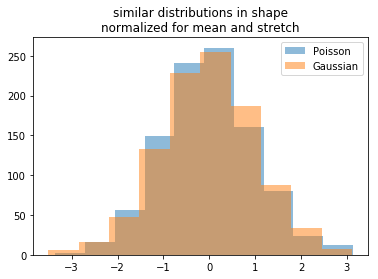

Poisson on Normal

KS Test: KstestResult(statistic=0.052468363120939276, pvalue=0.0078294399170928397)

AD Test: AndersonResult(statistic=2.3670726571554042, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

KL Test: 0.00491776967451

Pearson's Chi-Squared:


(None, Power_divergenceResult(statistic=-1861.7836790667943, pvalue=1.0))

In [3]:
#Plot the Poisson & Normal distributions
pl.hist(pois, alpha=0.5, label="Poisson")
pl.hist(norm, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nnormalized for mean and stretch")
pl.show()

#Run the KS test for Poisson
print ("Poisson on Normal\n")
print ("KS Test:", scipy.stats.kstest(pois,'norm'))

#Run the AD test for Poisson
print ("\nAD Test:", scipy.stats.anderson(pois, dist='norm'))

#Prepping and running the KL test for Poisson
pdfPois, poisBins, = np.histogram(pois, density=True)
poisBinCent = poisBins[:-1] + 0.5*(poisBins[1] - poisBins[0])

print ("\nKL Test:", scipy.stats.entropy(pdfPois, scipy.stats.norm.pdf(poisBinCent)))

#Running the Chi-Square test for Poisson
print ("\nPearson's Chi-Squared:"), scipy.stats.chisquare(pois, norm)

## Interpreting the Results

#### KS Test - Because the p-value (0.007) is below our chosen value (0.05), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### AD Test - Because out AD statistic (2.36) is larger than the critical value at 0.05 (0.784), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### KL Test - Because out KL statistic (0.0049) is  small we  can assert that the difference in entropy between our sample distribution and our Gaussian parameter is small



#### Chi-Square Test - I am uncertain of the accuracy of this calculation, and am unsure how to interpret 

---

# Testing the Binomial Distribution

## $H_0$: The sample distribution comes from a Gaussian distribution
### $\alpha$ = 0.05

## Plotting and running the tests

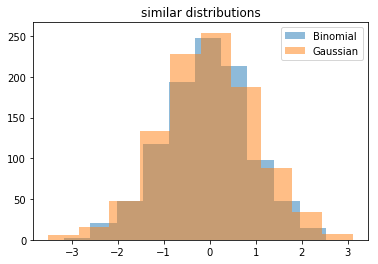

Binomial on Normal

KS Test: KstestResult(statistic=0.127, pvalue=1.6209256159527285e-14)

AD Test: AndersonResult(statistic=15.204460551392458, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

KL Test: 0.00641114132785

Pearson's Chi-Squared - 


(None,
 Power_divergenceResult(statistic=3416.8197399489045, pvalue=4.0325568531430412e-261))

In [4]:
#Plot the Binomial & Normal distributions
pl.figure()
pl.hist(binom, alpha=0.5, label="Binomial")
pl.hist(norm, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

#Run the KS test for Binomial
print ("Binomial on Normal\n")
print ("KS Test:", scipy.stats.kstest(binom,'norm'))

#Run the AD test for Binomial
print ("\nAD Test:", scipy.stats.anderson(binom,'norm'))

#Prepping and running the KL test for Binomial
pdfBinom, binomBins, = np.histogram(binom, density=True)
binomBinCent = binomBins[:-1] + 0.5*(binomBins[1] - binomBins[0])

print ("\nKL Test:", scipy.stats.entropy(pdfBinom, scipy.stats.norm.pdf(binomBinCent)))

#Running the Chi-Square test for Poisson
print ("\nPearson's Chi-Squared - "), scipy.stats.chisquare(binom, norm)

## Interpreting the Results

#### KS Test - Because the p-value is extremely smaller than our chosen value (0.05), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### AD Test - Because out AD statistic (15.2) is larger than the critical value at 0.05 (0.784), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### KL Test - Because out KL statistic (0.0064) is small, we can assert that the difference in entropy between our sample distribution and our Gaussian parameter is small


#### Chi-Square Test - I am uncertain of the accuracy of this calculation, and am unsure how to interpret 

---

# Looping for Increased Means

## Poisson

In [5]:
np.random.seed(999)

pois_KS_p_values = []
pois_KS_s_values = []
pois_AD_s_values = []
pois_KL_s_values = []
pois_CS_s_values = []
AD_threshold = 0.784

for i,n in enumerate(mean_array):
    lam = n 
    
    #Create The Distributions
    dist = (np.random.poisson(lam, 1000) - lam) * (1/np.sqrt(lam))
    norm = np.random.randn(1000) 
    
    #Determine the KS stats-values
    KS_s_value = scipy.stats.kstest(dist,'norm')[0]
    pois_KS_s_values.append(KS_s_value)
    
    #Determine the KS p-values
    KS_p_value = scipy.stats.kstest(dist,'norm')[1]
    pois_KS_p_values.append(KS_p_value)
    
    #Determine the AD stat-values
    AD_s_value = scipy.stats.anderson(dist,'norm')[0]
    pois_AD_s_values.append(AD_s_value)
    
    #Determine the KL statistic
    pdfBinom, binomBins, = np.histogram(dist, density=True)
    binomBinCent = binomBins[:-1] + 0.5*(binomBins[1] - binomBins[0])
    KL_s_value = scipy.stats.entropy(pdfBinom, scipy.stats.norm.pdf(binomBinCent))
    pois_KL_s_values.append(KL_s_value)  
    
    #Determine the Chi-Squ values
    CS_s_value = scipy.stats.chisquare(dist, norm)[1]
    pois_CS_s_values.append(CS_s_value)

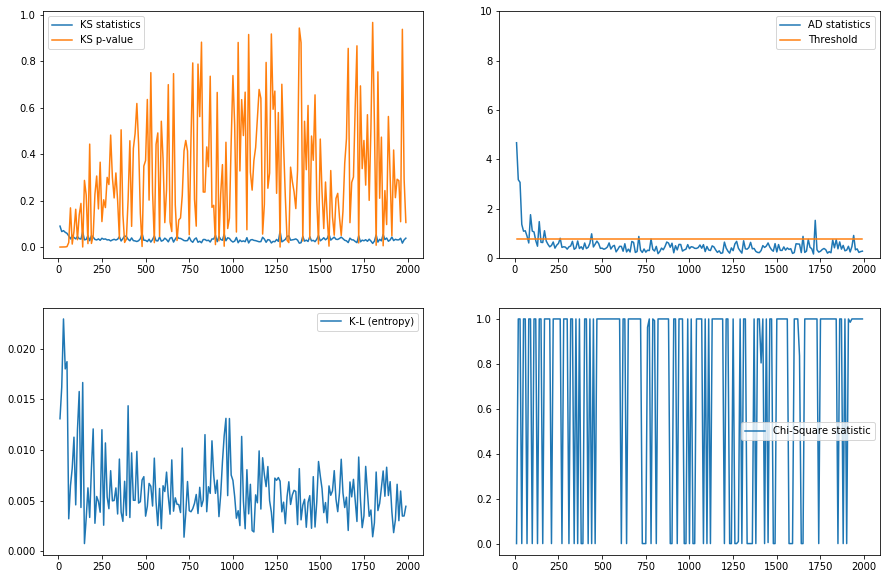

In [9]:
#Plotting

#KS Test
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(mean_array, pois_KS_s_values, label='KS statistics')
pl.plot(mean_array, pois_KS_p_values, label='KS p-value')
pl.legend()

#AD Test
fig.add_subplot(222)
pl.plot(mean_array, pois_AD_s_values,  label='AD statistics')
pl.plot([mean_array[0], mean_array[-1]],[AD_threshold, AD_threshold], label="Threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

#KL Test
fig.add_subplot(223)
pl.plot(mean_array, pois_KL_s_values, label='K-L (entropy)')
pl.legend()

#Chi-Square Test
fig.add_subplot(224)
pl.plot(mean_array, pois_CS_s_values, label='Chi-Square statistic')

pl.legend();

### All four charts show an increasing approximation of a Gaussian distribution as the means increase:
#### The KS test reveals a decreasing statistic, along with an increasing p-value, making it harder to reject $H_0$
#### The AD test reveals a statistic that regularly falls below the critical threshold, making it harder to reject $H_0$
#### The KL test shows a decrease in entropy, meaning the sample distribution requires less approximation to represent as a Gaussian distribution
#### The Chi-Square test was not calculated properly, and I am unsure of how to interpret the results

## Binomial

In [7]:
np.random.seed(999)

binom_KS_p_values = []
binom_KS_s_values = []
binom_AD_s_values = []
binom_KL_s_values = []
binom_CS_s_values = []
AD_threshold = 0.784

for i,n in enumerate(mean_array):
    p = 0.5
    #Create The Distributions
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    norm = np.random.randn(1000) 
    
    #Determine the KS stats-values
    KS_s_value = scipy.stats.kstest(dist,'norm')[0]
    binom_KS_s_values.append(KS_s_value)
    
    #Determine the KS p-values
    KS_p_value = scipy.stats.kstest(dist,'norm')[1]
    binom_KS_p_values.append(KS_p_value)
    
    #Determine the AD stat-values
    AD_s_value = scipy.stats.anderson(dist,'norm')[0]
    binom_AD_s_values.append(AD_s_value)
    
    #Determine the KL p-values
    pdfBinom, binomBins, = np.histogram(dist, density=True)
    binomBinCent = binomBins[:-1] + 0.5*(binomBins[1] - binomBins[0])
    KL_s_value = scipy.stats.entropy(pdfBinom, scipy.stats.norm.pdf(binomBinCent))
    binom_KL_s_values.append(KL_s_value)  
    
    #Determine the Chi-Squ values
    CS_s_value = scipy.stats.chisquare(dist, norm)[1]
    binom_CS_s_values.append(CS_s_value)

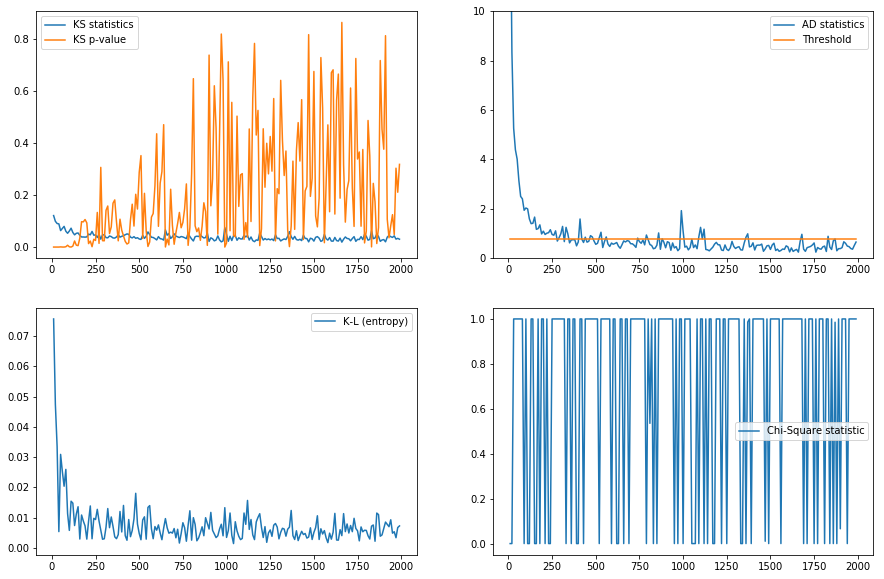

In [10]:
#Plotting

#KS Test
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(mean_array, binom_KS_s_values, label='KS statistics')
pl.plot(mean_array, binom_KS_p_values, label='KS p-value')
pl.legend()

#AD Test
fig.add_subplot(222)
pl.plot(mean_array, binom_AD_s_values,  label='AD statistics')
pl.plot([mean_array[0], mean_array[-1]],[AD_threshold, AD_threshold], label="Threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

#KL Test
fig.add_subplot(223)
pl.plot(mean_array, binom_KL_s_values, label='K-L (entropy)')
pl.legend()

#Chi-Square Test
fig.add_subplot(224)
pl.plot(mean_array, binom_CS_s_values, label='Chi-Square statistic')

pl.legend();

### All four charts show an increasing approximation of a Gaussian distribution as the means increase:
#### The KS test reveals a decreasing statistic, along with an increasing p-value, making it harder to reject $H_0$
#### The AD test reveals a statistic that regularly falls below the critical threshold, making it harder to reject $H_0$
#### The KL test shows a decrease in entropy, meaning the sample distribution requires less approximation to represent as a Gaussian distribution
#### The Chi-Square test was not calculated properly, and I am unsure of how to interpret the results

---
